In [1]:
# coding: utf-8
# 手肘法
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 输入数据
data  = pd.read_csv('team_cluster_data.csv',encoding='gbk')
train_x = data[['2019国际排名','2018世界杯排名','2015亚洲杯排名']]

In [3]:
# 规范化到 [0,1] 空间
min_max_scaler = preprocessing.MinMaxScaler()
train_x = min_max_scaler.fit_transform(train_x)

In [4]:
# 统计不同k取值的误差平方和
sse = []
for k in range(1,11):
    # kmeans算法
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_x)
    # 计算inertia簇内误差平方和
    sse.append(kmeans.inertia_)

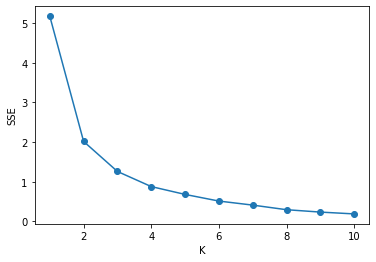

In [5]:
x = range(1,11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x,sse,'o-')
plt.show()

In [6]:
# k增大到一定程度时,k增大对SSE减小的作用越来越小
# 这里设置k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)

In [7]:
# 合并聚类结果,插入到原数据中
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'聚类结果'},axis=1,inplace=True)
print(result)

国家  2019国际排名  2018世界杯排名  2015亚洲杯排名  聚类结果
0       中国        73         40          7     2
1       日本        60         15          5     0
2       韩国        61         19          2     0
3       伊朗        34         18          6     0
4       沙特        67         26         10     0
5      伊拉克        91         40          4     2
6      卡塔尔       101         40         13     1
7      阿联酋        81         40          6     2
8   乌兹别克斯坦        88         40          8     2
9       泰国       122         40         17     1
10      越南       102         50         17     1
11      阿曼        87         50         12     1
12      朝鲜       110         50         14     1
13      印尼       164         50         17     1
14      澳洲        40         30          1     0
15     叙利亚        76         40         17     1
16      约旦       118         50          9     2
17     科威特       160         50         15     1


In [8]:
# 将结果导出到CSV文件中
result.to_csv('team_cluster_result.csv',encoding='gbk')